In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import os
from IPython.display import display, HTML

## Data Loading

In [2]:
## personal saving - comparison
## unemploy rate - year
## NAQ & SP500 & DOW - year
## Mortgage - year

In [3]:
path = os.path.dirname(os.getcwd())+'/dataset/'

In [4]:
df_personal_saving = pd.read_csv(path + "personal_saving.csv")
df_unemploy = pd.read_csv(path + "unemploy.csv")
# df_mortgage = pd.read_csv(path + "State_Level_Mortgage_Performance_Statistics.csv")

df_NASDAQ = pd.read_csv(path+"NASDAQ.csv")
df_DOW = pd.read_csv(path+"DOW.csv")
df_SP500 = pd.read_csv(path+"SP500.csv")

In [5]:
df_personal_saving.head()

,DATE,PSAVERT
0,2019-01-01,8.5
1,2019-02-01,8.6
2,2019-03-01,8.0
3,2019-04-01,7.5
4,2019-05-01,7.3


In [6]:
df_unemploy.head()

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate
0,Alabama,1/4/2020,"4,578",12/28/2019,"18,523","1,923,741",0.96
1,Alabama,1/11/2020,"3,629",1/4/2020,"21,143","1,923,741",1.10
2,Alabama,1/18/2020,"2,483",1/11/2020,"17,402","1,923,741",0.90
3,Alabama,1/25/2020,"2,129",1/18/2020,"18,390","1,923,741",0.96
4,Alabama,2/1/2020,"2,170",1/25/2020,"17,284","1,923,741",0.90


In [7]:
df_NASDAQ.head()

,DATE,NASDAQCOM
0,2016-03-29,4846.62
1,2016-03-30,4869.29
2,2016-03-31,4869.85
3,2016-04-01,4914.54
4,2016-04-04,4891.80


In [8]:
df_DOW.head()

,DATE,DJIA
0,2016-03-30,17716.66
1,2016-03-31,17685.09
2,2016-04-01,17792.75
3,2016-04-04,17737.00
4,2016-04-05,17603.32


In [9]:
df_SP500.head()

,DATE,SP500
0,2016-03-30,2063.95
1,2016-03-31,2059.74
2,2016-04-01,2072.78
3,2016-04-04,2066.13
4,2016-04-05,2045.17


### Data Manipulation - Cleaning, Reformat, Grouping

#### 1. Convert Date format

#### Personal Saving

In [10]:
df_personal_saving["DATE"] = pd.to_datetime(df_personal_saving["DATE"], format="%Y-%m-%d")

In [11]:
df_personal_saving_groupbyYear = df_personal_saving.groupby(df_personal_saving['DATE'].map(lambda x: x.year))

/Users/J.P./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


2019         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2020    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2021             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

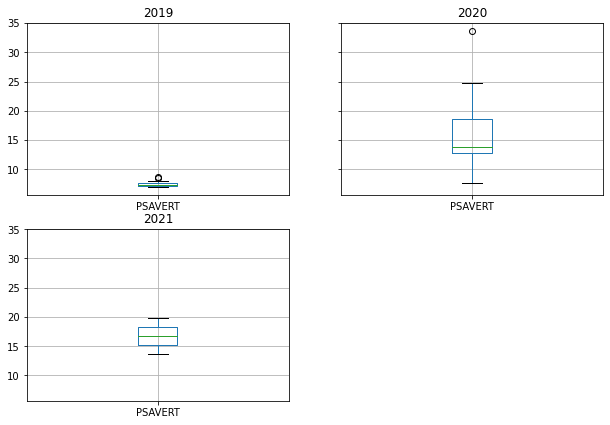

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
df_personal_saving_groupbyYear.boxplot(ax = ax)

#### Add peak point value in plot

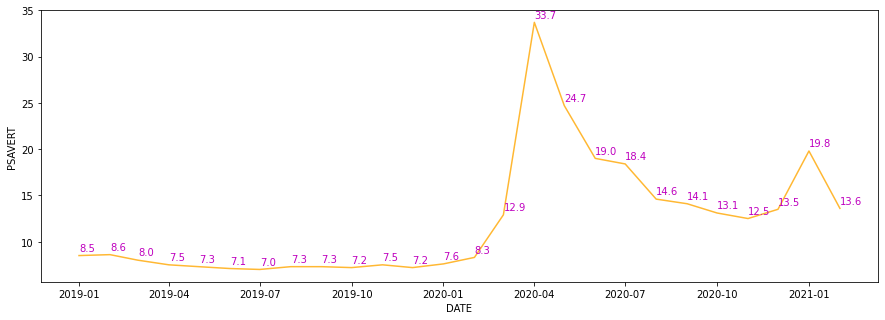

In [15]:
fig2, ax2 = plt.subplots(figsize=(15, 5))
sns.lineplot(x="DATE",y="PSAVERT", data=df_personal_saving, color="#FFB833", ax=ax2)

for _row in df_personal_saving.index:
    ax2.text(df_personal_saving.iloc[_row].DATE, 
             df_personal_saving.iloc[_row].PSAVERT + 0.5, 
             df_personal_saving.iloc[_row].PSAVERT, color="m")

#### USA - Unemployment

In [16]:
df_unemploy_USA = pd.read_excel(path + "UNRATE.xls")
df_unemploy_USA = df_unemploy_USA[df_unemploy_USA.observation_date.dt.year>=2019].reset_index()

In [17]:
df_unemploy_USA.head()

,index,observation_date,UNRATE
0,34,2019-01-01,4.0
1,35,2019-02-01,3.8
2,36,2019-03-01,3.8
3,37,2019-04-01,3.7
4,38,2019-05-01,3.7


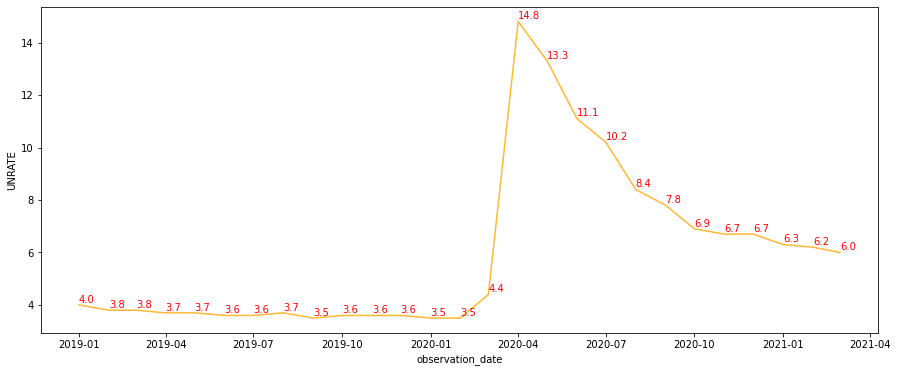

In [18]:
fig, ax3 = plt.subplots(figsize=(15, 6))

sns.lineplot(x="observation_date",y="UNRATE", data=df_unemploy_USA, color="#FFB833", ax=ax3)
for _row in df_unemploy_USA.index:
    ax3.text(df_unemploy_USA.iloc[_row].observation_date, 
             df_unemploy_USA.iloc[_row].UNRATE + 0.1, 
             df_unemploy_USA.iloc[_row].UNRATE, color="r")

#### Each State - Employment

In [19]:
## Data cleaning and reformat
def clean_num(row):
    row = row.replace(",", "")
    return row

df_unemploy["Initial Claims"] = df_unemploy["Initial Claims"].map(clean_num)
df_unemploy["Continued Claims"] = df_unemploy["Continued Claims"].map(clean_num)
df_unemploy["Covered Employment"] = df_unemploy["Covered Employment"].map(clean_num)

In [20]:
State_List = df_unemploy.State.unique()

## Date
df_unemploy["Filed week ended"] = pd.to_datetime(df_unemploy["Filed week ended"])
df_unemploy["Reflecting Week Ended"] = pd.to_datetime(df_unemploy["Reflecting Week Ended"])

## Numeric
df_unemploy["Covered Employment"] = pd.to_numeric(df_unemploy["Covered Employment"])
df_unemploy["Insured Unemployment Rate"] = pd.to_numeric(df_unemploy["Insured Unemployment Rate"])

df_unemploy["Initial Claims"] = pd.to_numeric(df_unemploy["Initial Claims"])
df_unemploy["Continued Claims"] = pd.to_numeric(df_unemploy["Continued Claims"])

In [21]:
df_unemploy.head()

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate
0,Alabama,2020-01-04,4578,2019-12-28,18523,1923741,0.96
1,Alabama,2020-01-11,3629,2020-01-04,21143,1923741,1.10
2,Alabama,2020-01-18,2483,2020-01-11,17402,1923741,0.90
3,Alabama,2020-01-25,2129,2020-01-18,18390,1923741,0.96
4,Alabama,2020-02-01,2170,2020-01-25,17284,1923741,0.90


In [22]:
df_unemploy['Claims'] = df_unemploy["Initial Claims"]+df_unemploy["Continued Claims"]

In [23]:
df_unemploy=df_unemploy[['State','Filed week ended','Insured Unemployment Rate','Claims']]

In [24]:
df_unemploy.head()

,State,Filed week ended,Insured Unemployment Rate,Claims
0,Alabama,2020-01-04,0.96,23101
1,Alabama,2020-01-11,1.10,24772
2,Alabama,2020-01-18,0.90,19885
3,Alabama,2020-01-25,0.96,20519
4,Alabama,2020-02-01,0.90,19454


In [25]:
df_unemploy["Filed week ended"]=df_unemploy["Filed week ended"].dt.to_period('m')

In [26]:
df_unemploy=df_unemploy.groupby(['State', 'Filed week ended'], as_index=False).mean()[['State', 'Filed week ended', 'Insured Unemployment Rate', 'Claims']]

In [27]:
df_unemploy=df_unemploy.round({'Insured Unemployment Rate': 2, 'Claims': 0})

In [28]:
df_unemploy.head()

,State,Filed week ended,Insured Unemployment Rate,Claims
0,Alabama,2020-01,0.98,22069.0
1,Alabama,2020-02,0.85,18203.0
2,Alabama,2020-03,0.74,38164.0
3,Alabama,2020-04,6.04,197834.0
4,Alabama,2020-05,10.46,227808.0


In [29]:
df_unemploy=df_unemploy.rename(columns={"State": "State", "Filed week ended": "Date","Insured Unemployment Rate": "Monthly Unemployment Rate","Claims": "Monthly Unemployment Issurance Claims" })

In [30]:
df_unemploy.head()

,State,Date,Monthly Unemployment Rate,Monthly Unemployment Issurance Claims
0,Alabama,2020-01,0.98,22069.0
1,Alabama,2020-02,0.85,18203.0
2,Alabama,2020-03,0.74,38164.0
3,Alabama,2020-04,6.04,197834.0
4,Alabama,2020-05,10.46,227808.0


In [31]:
embed = """<div id="observablehq-legend1-830ca84c"></div>
<div id="observablehq-chart1-830ca84c"></div>
<p>Credit: <a href="https://observablehq.com/d/f2a8009611526bab">umeployment by Jeff Pan</a></p>

<script type="module">
import {Runtime, Inspector} from "https://cdn.jsdelivr.net/npm/@observablehq/runtime@4/dist/runtime.js";
import define from "https://api.observablehq.com/d/f2a8009611526bab.js?v=3";
new Runtime().module(define, name => {
  if (name === "legend1") return new Inspector(document.querySelector("#observablehq-legend1-830ca84c"));
  if (name === "chart1") return new Inspector(document.querySelector("#observablehq-chart1-830ca84c"));
});
</script>
"""
display(HTML(embed))

In [32]:
embed2 = """<div id="observablehq-legend2-36d89b4c"></div>
<div id="observablehq-chart2-36d89b4c"></div>
<p>Credit: <a href="https://observablehq.com/d/f2a8009611526bab">umeployment by Jeff Pan</a></p>

<script type="module">
import {Runtime, Inspector} from "https://cdn.jsdelivr.net/npm/@observablehq/runtime@4/dist/runtime.js";
import define from "https://api.observablehq.com/d/f2a8009611526bab.js?v=3";
new Runtime().module(define, name => {
  if (name === "legend2") return new Inspector(document.querySelector("#observablehq-legend2-36d89b4c"));
  if (name === "chart2") return new Inspector(document.querySelector("#observablehq-chart2-36d89b4c"));
});
</script>
"""
display(HTML(embed2))

#### Stock Data

In [33]:
df_DOW["DATE"] = pd.to_datetime(df_DOW["DATE"], format="%Y-%m-%d")
df_NASDAQ["DATE"] = pd.to_datetime(df_NASDAQ["DATE"], format="%Y-%m-%d")
df_SP500["DATE"] = pd.to_datetime(df_SP500["DATE"], format="%Y-%m-%d")

In [34]:
## remove holiday stock data -> no-value
df_DOW = df_DOW[df_DOW["DJIA"]!="."]
df_NASDAQ = df_NASDAQ[df_NASDAQ["NASDAQCOM"]!="."]
df_SP500 = df_SP500[df_SP500["SP500"]!="."]


## shrink stock data within 3 years
df_DOW = df_DOW[df_DOW.DATE.dt.year>=2019]
df_NASDAQ = df_NASDAQ[df_NASDAQ.DATE.dt.year>=2019]
df_SP500 = df_SP500[df_SP500.DATE.dt.year>=2019]

In [35]:
df_DOW["DJIA"] = pd.to_numeric(df_DOW["DJIA"])
df_NASDAQ["NASDAQCOM"] = pd.to_numeric(df_NASDAQ["NASDAQCOM"])
df_SP500["SP500"] = pd.to_numeric(df_SP500["SP500"])

### Analytics - Stock Price Plot

#### 1. DOW

<AxesSubplot:xlabel='DATE', ylabel='DJIA'>

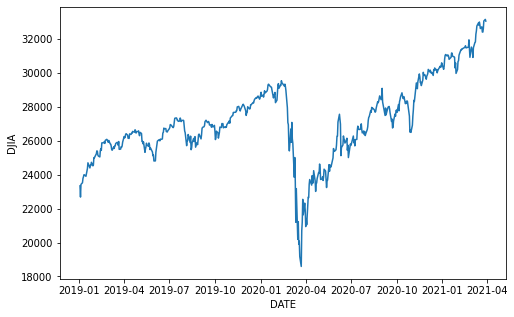

In [36]:
fig, ax4 = plt.subplots(figsize=(8,5))
sns.lineplot(x = "DATE", y="DJIA", data=df_DOW, ax = ax4)

#### 2.NASDAQ

<AxesSubplot:xlabel='DATE', ylabel='NASDAQCOM'>

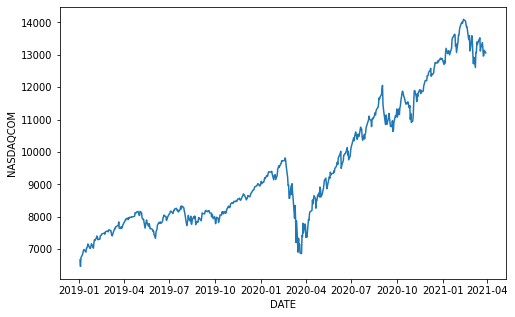

In [37]:
fig, ax5 = plt.subplots(figsize=(8,5))
sns.lineplot(x = "DATE", y="NASDAQCOM", data=df_NASDAQ, ax=ax5)

#### 3. SP500

<AxesSubplot:xlabel='DATE', ylabel='SP500'>

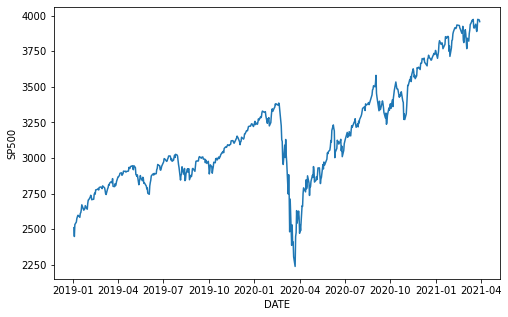

In [38]:
fig, ax6 = plt.subplots(figsize=(8,5))
sns.lineplot(x = "DATE", y="SP500", data=df_SP500, ax=ax6)

### House price Analytics - ASPUS - quarter/year

In [39]:
df_house_price = pd.read_excel(path + "HousePrice.xls")
df_house_price = df_house_price[df_house_price.observation_date.dt.year>=2019].reset_index(drop=True)

<AxesSubplot:xlabel='observation_date', ylabel='ASPUS'>

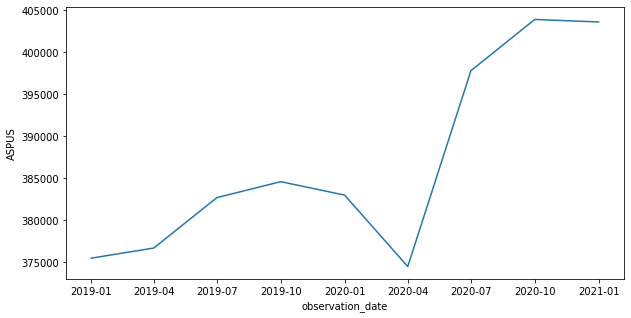

In [40]:
fig, ax8 = plt.subplots(figsize=(10,5))
sns.lineplot(x="observation_date", y="ASPUS", data=df_house_price)

### Mortgage Analytics - quarter/year

In [41]:
df_mortgage = pd.read_excel(path + "MORTGAGE30US.xls")
df_mortgage = df_mortgage[df_mortgage.observation_date.dt.year>=2019].reset_index(drop=True)

In [42]:
df_mortgage["observation_date"] = pd.to_datetime(df_mortgage['observation_date'], format = '%Y-%m-%d')

<AxesSubplot:xlabel='observation_date', ylabel='MORTGAGE30US'>

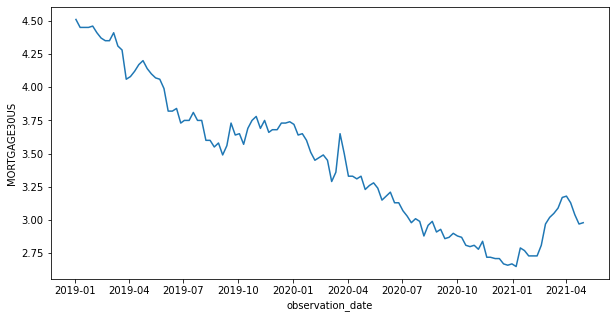

In [43]:
fig, ax9 = plt.subplots(figsize=(10,5))
sns.lineplot(x="observation_date", y="MORTGAGE30US", data=df_mortgage)

<AxesSubplot:xlabel='observation_date'>

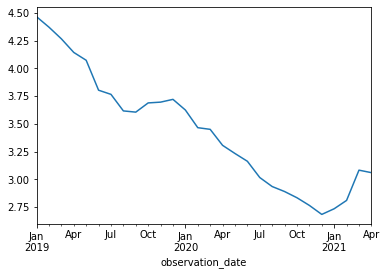

In [44]:
df_mortgage.set_index('observation_date', inplace=True)
df_mortgage.resample('1M').mean()['MORTGAGE30US'].plot()

#### Personal Income Analytics

##

df_personal_income = pd.read_excel(path + "PI.xls")
df_personal_income_simple = df_personal_income[df_personal_income.observation_date.dt.year>=2019]

In [ ]:
df_personal_income_simple.dtypes

In [ ]:
fig, ax10 = plt.subplots(figsize=(10,5))
sns.lineplot(x="observation_date", y="PI", data=df_personal_income_simple)